# Making a model - All data - Less categorized - Target: f_bicicletes_implicades

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Opening the dataset1 once cleaned. Accidents

In [4]:
data = pd.read_csv('Accidents_cleaned_less_categorized.csv')
pd.set_option("display.max_columns", None)
data.head(60)


zona      via       pk                    nommun  \
0   Zona urbana       SE   over 5         CANOVES I SAMALUS   
1     Carretera    N-240   over 5                    LLEIDA   
2     Carretera     N-II   over 5      FORNELLS DE LA SELVA   
3   Zona urbana       SE   over 5                 BARCELONA   
4   Zona urbana       SE   over 5                  BADALONA   
5     Carretera       SE   over 5  SANT CARLES DE LA RAPITA   
6   Zona urbana       SE   over 5                 BARCELONA   
7   Zona urbana       SE   over 5                 BARCELONA   
8     Carretera     AP-7  under 5         MOLLET DEL VALLES   
9     Carretera       SE   over 5     CERDANYOLA DEL VALLES   
10  Zona urbana     C-31  under 5      TORROELLA DE MONTGRI   
11  Zona urbana       SE   over 5                     ODENA   
12    Carretera     N-II   over 5                    GIRONA   
13  Zona urbana       SE   over 5                 BARCELONA   
14  Zona urbana       SE   over 5                      REUS   
15  Zona urbana       SE   over 5                      OLOT   
16  Zona urbana       SE   over 5                    LLEIDA   
17    Carretera    B-522   over 5                   MANLLEU   
18  Zona urbana       SE   over 5                 BARCELONA   
19    Carretera     C-14  under 5                   ORGANYA   
20    Carretera   GI-673  under 5       CALDES DE MALAVELLA   
21    Carretera  LV-3021  under 5           ARTESA DE SEGRE   
22  Zona urbana       SE   over 5                 MARTORELL   
23    Carretera     C-17  under 5                TAGAMANENT   
24  Zona urbana       SE   over 5                  TERRASSA   
25  Zona urbana       SE   over 5         MOLLET DEL VALLES   
26    Carretera       SE   over 5      PRAT DE LLOBREGAT, E   
27  Zona urbana       SE   over 5               FULIOLA, LA   
28  Zona urbana       SE   over 5                 BARCELONA   
29  Zona urbana       SE   over 5                   MANRESA   
30  Zona urbana       SE   over 5                  ROQUETES   
31  Zona urbana  TP-7225   over 5                MORELL, EL   
32  Zona urbana       SE   over 5                 BARCELONA   
33    Carretera       AL  under 5                 BARCELONA   
34    Carretera  C-1415B   over 5             LLICA D'AMUNT   
35  Zona urbana       SE   over 5                 BARCELONA   
36    Carretera     C-55  under 5                  COLLBATO   
37  Zona urbana       SE   over 5                  TERRASSA   
38  Zona urbana       SE   over 5                    GIRONA   
39    Carretera  BP-2121   over 5        SANT MARTI SARROCA   
40  Zona urbana       SE   over 5                    ALELLA   
41  Zona urbana       SE   over 5     CORNELLA DE LLOBREGAT   
42    Carretera     C-31  under 5                  CALAFELL   
43  Zona urbana       SE   over 5                 BARCELONA   
44    Carretera     N-II   over 5           SANT POL DE MAR   
45    Carretera       SE   over 5       TORROELLA DE FLUVIA   
46  Zona urbana       SE   over 5                  VIDRERES   
47    Carretera  TV-3405   over 5                   AMPOSTA   
48  Zona urbana       SE   over 5     SANT BOI DE LLOBREGAT   
49  Zona urbana       SE   over 5                   ALCANAR   
50  Zona urbana       SE   over 5                 BARCELONA   
51    Carretera   GI-634  under 5                    VERGES   
52  Zona urbana       SE   over 5                      GAVA   
53    Carretera  BV-2415  under 5                  OLERDOLA   
54  Zona urbana       SE   over 5                 BARCELONA   
55    Carretera     C-31  under 5                    SITGES   
56  Zona urbana       SE   over 5                  FIGUERES   
57    Carretera     C-66  under 5                     FLACA   
58  Zona urbana       SE   over 5               PALAFRUGELL   
59    Carretera     C-59  under 5         CALDES DE MONTBUI   

               nomcom     nomdem  f_morts  f_ferits_greus  f_ferits_lleus  \
0     Valles Oriental  Barcelona        0               1               0   
1            

# Splitting the dataset with our target = f_bicicletes_implicades = bikes involved on a crash

In [5]:
y=data['f_bicicletes_implicades']
X=data.drop('f_bicicletes_implicades', axis=1)
y.value_counts()

0    19438
1     1723
Name: f_bicicletes_implicades, dtype: int64

# splitting in train and test data to focus on train features encoding and scaling

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(14812, 56)

(6349, 56)

(14812,)

(6349,)

In [8]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [9]:
display(X_train_cat.shape)
display(X_train_num.shape)
display(X_test_cat.shape)
display(X_test_num.shape) 

(14812, 43)

(14812, 13)

(6349, 43)

(6349, 13)

# OneHot encoding with categorical features

In [10]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode

zona_Zona urbana  via_A-22  via_A-26  via_A-27  via_A-7  via_AL  \
0                   1.0       0.0       0.0       0.0      0.0     0.0   
1                   0.0       0.0       0.0       0.0      0.0     0.0   
2                   1.0       0.0       0.0       0.0      0.0     0.0   
3                   0.0       0.0       0.0       0.0      0.0     0.0   
4                   0.0       0.0       0.0       0.0      0.0     0.0   
...                 ...       ...       ...       ...      ...     ...   
14807               1.0       0.0       0.0       0.0      0.0     0.0   
14808               0.0       0.0       0.0       0.0      0.0     0.0   
14809               1.0       0.0       0.0       0.0      0.0     0.0   
14810               1.0       0.0       0.0       0.0      0.0     0.0   
14811               1.0       0.0       0.0       0.0      0.0     0.0   

       via_AP-2  via_AP-7  via_B-10  via_B-100  via_B-112  via_B-120  \
0           0.0       0.0       0.0        0.0        0.0        0.0   
1           0.0       0.0       0.0        0.0        0.0        0.0   
2           0.0       0.0       0.0        0.0        0.0        0.0   
3           0.0       0.0       0.0        0.0        0.0        0.0   
4           0.0       0.0       0.0        0.0        0.0        0.0   
...         ...       ...       ...        ...        ...        ...   
14807       0.0       0.0       0.0        0.0        0.0        0.0   
14808       0.0       0.0       0.0        0.0        0.0        0.0   
14809       0.0       0.0       0.0        0.0        0.0        0.0   
14810       0.0       0.0       0.0        0.0        0.0        0.0   
14811       0.0       0.0       0.0        0.0        0.0        0.0   

       via_B-122  via_B-124  via_B-140  via_B-141  via_B-142  via_B-143  \
0            0.0        0.0        0.0        0.0        0.0        0.0   
1            0.0        0.0        0.0        0.0        0.0        0.0   
2            0.0        0.0        0.0        0.0        0.0        0.0   
3            0.0        0.0        0.0        0.0        0.0        0.0   
4            0.0        0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
14807        0.0        0.0        0.0        0.0        0.0        0.0   
14808        0.0        0.0        0.0        0.0        0.0        0.0   
14809        0.0        0.0        0.0        0.0        0.0        0.0   
14810        0.0        0.0        0.0        0.0        0.0        0.0   
14811        0.0        0.0        0.0        0.0        0.0        0.0   

       via_B-150  via_B-151  via_B-20  via_B-201  via_B-201z  via_B-204  \
0            0.0        0.0       0.0        0.0         0.0        0.0   
1            0.0        0.0       0.0        0.0         0.0        0.0   
2            0.0        0.0       0.0        0.0         0.0        0.0   
3            0.0        0.0       0.0        0.0         0.0        0.0   
4            0.0        0.0       0.0        0.0         0.0        0.0   
...          ...        ...       ...        ...         ...        ...   
14807        0.0        0.0       0.0        0.0         0.0        0.0   
14808        0.0        0.0       0.0        0.0         0.0        0.0   
14809        0.0        0.0       0.0        0.0         0.0        0.0   
14810        0.0        0.0       0.0        0.0         0.0        0.0   
14811        0.0        0.0       0.0        0.0         0.0        0.0   

       via_B-210  via_B-211  via_B-212  via_B-22  via_B-220  via_B-221  \
0            0.0        0.0        0.0       0.0        0.0        0.0   
1            0.0        0.0        0.0       0.0        0.0        0.0   
2            0.0        0.0        0.0       0.0        0.0        0.0   
3            0.0        0.0        0.0       0.0        0.0        0.0   
4            0.0        0.0        0.0       0.0        0.0        0.0   
...    

In [11]:
encoder = OneHotEncoder(drop='first').fit(X_test_cat)
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode


zona_Zona urbana  via_A-22  via_A-27  via_A-7  via_AL  via_AP-2  \
0                  1.0       0.0       0.0      0.0     0.0       0.0   
1                  1.0       0.0       0.0      0.0     0.0       0.0   
2                  0.0       0.0       0.0      0.0     0.0       0.0   
3                  1.0       0.0       0.0      0.0     0.0       0.0   
4                  0.0       0.0       0.0      0.0     0.0       0.0   
...                ...       ...       ...      ...     ...       ...   
6344               0.0       0.0       0.0      0.0     0.0       0.0   
6345               0.0       0.0       0.0      0.0     0.0       0.0   
6346               1.0       0.0       0.0      0.0     0.0       0.0   
6347               0.0       0.0       0.0      0.0     0.0       0.0   
6348               1.0       0.0       0.0      0.0     0.0       0.0   

      via_AP-7  via_B-10  via_B-112  via_B-120  via_B-122  via_B-124  \
0          0.0       0.0        0.0        0.0        0.0        0.0   
1          0.0       0.0        0.0        0.0        0.0        0.0   
2          0.0       0.0        0.0        0.0        0.0        0.0   
3          0.0       0.0        0.0        0.0        0.0        0.0   
4          1.0       0.0        0.0        0.0        0.0        0.0   
...        ...       ...        ...        ...        ...        ...   
6344       0.0       0.0        0.0        0.0        0.0        0.0   
6345       0.0       0.0        0.0        0.0        0.0        0.0   
6346       0.0       0.0        0.0        0.0        0.0        0.0   
6347       0.0       0.0        0.0        0.0        0.0        0.0   
6348       0.0       0.0        0.0        0.0        1.0        0.0   

      via_B-140  via_B-142  via_B-143  via_B-150  via_B-151  via_B-20  \
0           0.0        0.0        0.0        0.0        0.0       0.0   
1           0.0        0.0        0.0        0.0        0.0       0.0   
2           0.0        0.0        0.0        0.0        0.0       0.0   
3           0.0        0.0        0.0        0.0        0.0       0.0   
4           0.0        0.0        0.0        0.0        0.0       0.0   
...         ...        ...        ...        ...        ...       ...   
6344        0.0        0.0        0.0        0.0        0.0       0.0   
6345        0.0        0.0        0.0        0.0        0.0       0.0   
6346        0.0        0.0        0.0        0.0        0.0       0.0   
6347        0.0        0.0        0.0        0.0        0.0       0.0   
6348        0.0        0.0        0.0        0.0        0.0       0.0   

      via_B-204  via_B-210  via_B-211  via_B-212  via_B-22  via_B-220  \
0           0.0        0.0        0.0        0.0       0.0        0.0   
1           0.0        0.0        0.0        0.0       0.0        0.0   
2           0.0        0.0        0.0        0.0       0.0        0.0   
3           0.0        0.0        0.0        0.0       0.0        0.0   
4           0.0        0.0        0.0        0.0       0.0        0.0   
...         ...        ...        ...        ...       ...        ...   
6344        0.0        0.0        0.0        0.0       0.0        0.0   
6345        0.0        0.0        0.0        0.0       0.0        0.0   
6346        0.0        0.0        0.0        0.0       0.0        0.0   
6347        0.0        0.0        0.0        0.0       0.0        0.0   
6348        0.0        0.0        0.0        0.0       0.0        0.0   

      via_B-221  via_B-224  via_B-225  via_B-23  via_B-231  via_B-24  \
0           0.0        0.0        0.0       0.0        0.0       0.0   
1           0.0        0.0        0.0       0.0        0.0       0.0   
2           0.0        0.0        0.0       0.0        0.0       0.0   
3           0.0        0.0        0.0       0.0        0.0       0.0   
4           0.0        0.0        0.0       0.0        0.0       0.0   
...         ...        ...        ...       ...        ...       ...   
6344  

# Scaling with numerical features

In [12]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)

(14812, 13)


In [13]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(6349, 13)


f_morts  f_ferits_greus  f_ferits_lleus  f_unitats_implicades  \
0     0.000000        0.043478            0.00                  0.00   
1     0.000000        0.043478            0.00                  0.05   
2     0.000000        0.043478            0.00                  0.00   
3     0.153846        0.000000            0.00                  0.00   
4     0.000000        0.043478            0.00                  0.05   
...        ...             ...             ...                   ...   
6344  0.000000        0.043478            0.00                  0.05   
6345  0.000000        0.086957            0.04                  0.10   
6346  0.000000        0.043478            0.00                  0.05   
6347  0.000000        0.043478            0.04                  0.00   
6348  0.000000        0.043478            0.04                  0.05   

      f_vianants_implicades  f_ciclomotors_implicades  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   
...                     ...                       ...   
6344                    0.0                       0.0   
6345                    0.0                       0.0   
6346                    0.0                       0.0   
6347                    0.0                       0.0   
6348                    0.0                       0.0   

      f_motocicletes_implicades  f_veh_lleugers_implicades  \
0                      0.142857                   0.000000   
1                      0.142857                   0.058824   
2                      0.142857                   0.000000   
3                      0.142857                   0.000000   
4                      0.000000                   0.000000   
...                         ...                        ...   
6344                   0.142857                   0.058824   
6345                   0.000000                   0.176471   
6346                   0.142857                   0.058824   
6347                   0.142857                   0.000000   
6348                   0.000000                   0.117647   

      f_veh_pesants_implicades  f_altres_unit_implicades      year     month  \
0                        0.000                       0.0  0.454545  0.181818   
1                        0.000                       0.0  0.272727  0.909091   
2                        0.000                       0.0  0.363636  0.363636   
3                        0.000                       0.0  0.363636  0.545455   
4                        0.125                       0.0  0.090909  0.181818   
...                        ...                       ...       ...       ...   
6344                     0.000                       0.0  0.272727  0.545455   
6345                     0.000                       0.0  0.818182  0.090909   
6346                     0.000                       0.0  0.909091  0.545455   
6347                     0.000                       0.0  1.000000  0.545455   
6348                     0.000                       0.0  0.636364  0.454545   

       weekday  
0     1.000000  
1     0.833333  
2     0.833333  
3     1.000000  
4     0.000000  
...        ...  
6344  0.666667  
6345  1.000000  
6346  0.500000  
6347  0.833333  
6348  0.166667  

[6349 rows x 13 columns]

# Concating numerical and categorical for train and test

In [14]:
X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [15]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test.index
y_test.reset_index(drop = True, inplace = True)

In [16]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape) 

(14812, 1693)

(14812,)

(6349, 1393)

(6349,)

# making full df for training set for feature selection

In [17]:
data = pd.concat([X_train,y_train],axis = 1)
data.head(10)

f_morts  f_ferits_greus  f_ferits_lleus  f_unitats_implicades  \
0      0.0        0.043478             0.0                  0.05   
1      0.0        0.043478             0.0                  0.05   
2      0.0        0.086957             0.0                  0.05   
3      0.0        0.043478             0.0                  0.05   
4      0.0        0.043478             0.0                  0.05   
5      0.0        0.043478             0.0                  0.05   
6      0.0        0.043478             0.0                  0.05   
7      0.0        0.043478             0.0                  0.05   
8      0.0        0.043478             0.0                  0.10   
9      0.0        0.043478             0.0                  0.05   

   f_vianants_implicades  f_ciclomotors_implicades  f_motocicletes_implicades  \
0                  0.000                       0.0                   0.142857   
1                  0.000                       0.0                   0.142857   
2                  0.000                       0.0                   0.142857   
3                  0.000                       0.0                   0.142857   
4                  0.000                       0.0                   0.000000   
5                  0.000                       0.0                   0.000000   
6                  0.000                       0.0                   0.142857   
7                  0.125                       0.0                   0.000000   
8                  0.000                       0.0                   0.142857   
9                  0.000                       0.0                   0.142857   

   f_veh_lleugers_implicades  f_veh_pesants_implicades  \
0                   0.058824                       0.0   
1                   0.058824                       0.0   
2                   0.058824                       0.0   
3                   0.058824                       0.0   
4                   0.058824                       0.0   
5                   0.058824                       0.0   
6                   0.058824                       0.0   
7                   0.058824                       0.0   
8                   0.117647                       0.0   
9                   0.058824                       0.0   

   f_altres_unit_implicades      year     month   weekday  zona_Zona urbana  \
0                       0.0  0.272727  0.909091  0.500000               1.0   
1                       0.0  0.636364  0.090909  0.333333               0.0   
2                       0.0  0.636364  0.000000  0.000000               1.0   
3                       0.0  0.727273  0.545455  1.000000               0.0   
4                       0.0  0.272727  0.545455  0.666667               0.0   
5                       0.0  0.272727  0.181818  0.500000               0.0   
6                       0.0  0.545455  0.363636  0.000000               1.0   
7                       0.0  1.000000  1.000000  0.333333               1.0   
8                       0.0  0.272727  0.818182  1.000000               1.0   
9                       0.0  0.636364  0.818182  1.000000               1.0   

   via_A-22  via_A-26  via_A-27  via_A-7  via_AL  via_AP-2  via_AP-7  \
0       0.0       0.0       0.0      0.0     0.0       0.0       0.0   
1       0.0       0.0       0.0      0.0     0.0       0.0       0.0   
2       0.0       0.0       0.0      0.0     0.0       0.0       0.0   
3       0.0       0.0       0.0      0.0     0.0       0.0       0.0   
4       0.0       0.0       0.0      0.0     0.0       0.0       0.0   
5       0.0       0.0       0.0      0.0     0.0       0.0       0.0   
6       0.0       0.0       0.0      0.0     0.0       0.0       0.0   
7       0.0       0.0       0.0      0.0     0.0       0.0       0.0   
8       0.0       0.0       0.0      0.0     0.0       0.0       0.0   
9       0.0       0.0       0.0      0.0     0.0       0.0       0.0   

   via_B-10  via_B-100  via_B-112  via_B-120  via_B-122  via

# using variancethreshold to drop some columns with very low variance.

In [18]:
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train)
temp = sel.transform(X_train)
temp = pd.DataFrame(temp)
print(X_train.shape)
print(temp.shape)

(14812, 1693)
(14812, 109)


In [19]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
len(var_list)

1693

In [20]:
len(X_train.columns)

1693

In [21]:
len(list(zip(X_train.columns,var_list)))

1693

In [22]:
drop_list = [col[0] for col in zip(X_train.columns,var_list) if col[1] == False]
len(drop_list)

1584

In [23]:
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel_test = VarianceThreshold(threshold=Var_threshold)
                        
sel_test = sel_test.fit(X_test)
temp_test = sel_test.transform(X_test)
temp_test = pd.DataFrame(temp_test)
print(X_test.shape)
print(temp_test.shape)

(6349, 1393)
(6349, 111)


In [24]:
sel_test.variances_ > Var_threshold
sel_test.get_support()
var_list_X_test= list(sel_test.get_support())
len(var_list_X_test)

1393

In [25]:
drop_list_test = [col[0] for col in zip(X_test.columns,var_list_X_test) if col[1] == False]
len(drop_list_test)

1282

# dropping the features with Var_threshold

In [26]:
X_train = X_train.drop(drop_list, axis = 1)
X_train

year     month   weekday  zona_Zona urbana  via_N-II  via_SE  \
0      0.272727  0.909091  0.500000               1.0       0.0     1.0   
1      0.636364  0.090909  0.333333               0.0       0.0     1.0   
2      0.636364  0.000000  0.000000               1.0       0.0     1.0   
3      0.727273  0.545455  1.000000               0.0       0.0     0.0   
4      0.272727  0.545455  0.666667               0.0       0.0     0.0   
...         ...       ...       ...               ...       ...     ...   
14807  0.272727  1.000000  0.166667               1.0       0.0     1.0   
14808  0.000000  0.818182  0.000000               0.0       0.0     1.0   
14809  0.363636  0.454545  0.500000               1.0       0.0     1.0   
14810  0.000000  0.727273  1.000000               1.0       0.0     1.0   
14811  0.727273  0.545455  0.500000               1.0       0.0     1.0   

       pk_under 5  nommun_BARCELONA  nommun_LLEIDA  nommun_SABADELL  \
0             0.0               0.0            0.0              0.0   
1             0.0               0.0            0.0              0.0   
2             0.0               0.0            0.0              0.0   
3             1.0               0.0            0.0              0.0   
4             0.0               0.0            0.0              0.0   
...           ...               ...            ...              ...   
14807         0.0               0.0            0.0              0.0   
14808         0.0               0.0            0.0              0.0   
14809         0.0               1.0            0.0              0.0   
14810         0.0               0.0            0.0              0.0   
14811         0.0               1.0            0.0              0.0   

       nommun_TERRASSA  nomcom_Alt Emporda  nomcom_Alt Penedes  nomcom_Bages  \
0                  0.0                 0.0                 0.0           1.0   
1                  0.0                 0.0                 0.0           0.0   
2                  0.0                 0.0                 0.0           0.0   
3                  0.0                 0.0                 0.0           0.0   
4                  0.0                 0.0                 0.0           0.0   
...                ...                 ...                 ...           ...   
14807              0.0                 0.0                 0.0           0.0   
14808              0.0                 0.0                 0.0           0.0   
14809              0.0                 0.0                 0.0           0.0   
14810              0.0                 0.0                 0.0           0.0   
14811              0.0                 0.0                 0.0           0.0   

       nomcom_Baix Camp  nomcom_Baix Llobregat  nomcom_Barcelones  \
0                   0.0                    0.0                0.0   
1                   0.0                    0.0                0.0   
2                   0.0                    0.0                0.0   
3                   0.0                    0.0                0.0   
4                   0.0                    0.0                0.0   
...                 ...                    ...                ...   
14807               0.0                    0.0                1.0   
14808               0.0                    0.0                0.0   
14809               0.0                    0.0                1.0   
14810               0.0                    0.0                0.0   
14811               0.0                    0.0                1.0   

       nomcom_Girones  nomcom_Maresme  nomcom_Osona  nomcom_Segria  \
0                 0.0             0.0           0.0            0.0   
1                 0.0             0.0           0.0            0.0   
2                 0.0             0.0           0.0            0.0   
3                 1.0             0.0           0.0            0.0   
4                 0.0             0.0           0.0            0.0   
...               ...             ...          

In [27]:
X_test = X_test.drop(drop_list_test, axis = 1)
X_test

year     month   weekday  zona_Zona urbana  via_AP-7  via_N-II  \
0     0.454545  0.181818  1.000000               1.0       0.0       0.0   
1     0.272727  0.909091  0.833333               1.0       0.0       0.0   
2     0.363636  0.363636  0.833333               0.0       0.0       0.0   
3     0.363636  0.545455  1.000000               1.0       0.0       0.0   
4     0.090909  0.181818  0.000000               0.0       1.0       0.0   
...        ...       ...       ...               ...       ...       ...   
6344  0.272727  0.545455  0.666667               0.0       0.0       0.0   
6345  0.818182  0.090909  1.000000               0.0       0.0       0.0   
6346  0.909091  0.545455  0.500000               1.0       0.0       0.0   
6347  1.000000  0.545455  0.833333               0.0       0.0       0.0   
6348  0.636364  0.454545  0.166667               1.0       0.0       0.0   

      via_SE  pk_under 5  nommun_BARCELONA  nommun_LLEIDA  nommun_SABADELL  \
0        0.0         1.0               0.0            0.0              0.0   
1        1.0         0.0               0.0            0.0              0.0   
2        0.0         1.0               0.0            0.0              0.0   
3        1.0         0.0               0.0            0.0              0.0   
4        0.0         1.0               0.0            0.0              0.0   
...      ...         ...               ...            ...              ...   
6344     0.0         1.0               0.0            0.0              0.0   
6345     0.0         1.0               0.0            0.0              0.0   
6346     1.0         0.0               0.0            0.0              0.0   
6347     0.0         0.0               0.0            0.0              0.0   
6348     0.0         1.0               0.0            0.0              0.0   

      nommun_TERRASSA  nomcom_Alt Emporda  nomcom_Alt Penedes  nomcom_Bages  \
0                 0.0                 0.0                 0.0           0.0   
1                 0.0                 0.0                 0.0           0.0   
2                 0.0                 0.0                 0.0           0.0   
3                 0.0                 0.0                 1.0           0.0   
4                 0.0                 0.0                 0.0           0.0   
...               ...                 ...                 ...           ...   
6344              0.0                 0.0                 0.0           0.0   
6345              0.0                 0.0                 0.0           0.0   
6346              0.0                 0.0                 0.0           0.0   
6347              0.0                 0.0                 0.0           0.0   
6348              1.0                 0.0                 0.0           0.0   

      nomcom_Baix Camp  nomcom_Baix Llobregat  nomcom_Barcelones  \
0                  0.0                    0.0                0.0   
1                  0.0                    0.0                0.0   
2                  0.0                    0.0                0.0   
3                  0.0                    0.0                0.0   
4                  0.0                    0.0                0.0   
...                ...                    ...                ...   
6344               0.0                    0.0                0.0   
6345               0.0                    1.0                0.0   
6346               0.0                    1.0                0.0   
6347               0.0                    0.0                0.0   
6348               0.0                    0.0                0.0   

      nomcom_Garraf  nomcom_Girones  nomcom_Maresme  nomcom_Osona  \
0               1.0             0.0             0.0           0.0   
1               0.0             0.0             0.0           1.0   
2               0.0             0.0             0.0           0.0   
3               0.0             0.0             0.0           0.0   
4               0.0             0.0             0

# using K-Best option to drop some columns with very low variance.

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X_train.shape)

K_best = SelectKBest(chi2, k=25).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(14812, 109)
(14812, 25)


0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   

    15   16   17   18   19   20   21   22   23   24  
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

In [29]:
model = SelectKBest(chi2, k=25).fit(X_train,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(109, 2)

score                                        column_name
65   145.912780                  d_subtipus_accident_Atropellament
98   145.912780                               tipacc_Atropellament
36   116.300963                d_carril_especial_Sense Especificar
102   88.890684     tipacc_Sortida de la calcada sense especificar
66    75.212962              d_subtipus_accident_Caiguda en la via
99    75.212962                        tipacc_Bolcada a la calcada
69    74.753888    d_subtipus_accident_Envestida (frontal lateral)
93    73.674244                                hor_08:00am-11:59am
71    73.661241          d_subtipus_accident_Resta sortides de via
96    53.972625                                        gruphor_Nit
101   47.660109              tipacc_Col.lisió de vehicles en marxa
40    46.430816                         d_gravetat_Accident mortal
94    43.623803                                hor_12:00am-07:59am
85    41.507161                          d_titularitat_via_Estatal
62    35.390976                    d_sentits_via_Sense Especificar
89    34.537426                            d_tracat_altimetric_Pla
56    32.871855       d_lluminositat_De nit, sense llum artificial
52    29.581584                    d_lluminositat_De dia, dia clar
55    28.478874  d_lluminositat_De nit, il·luminació artificial...
84    27.960025                       d_titularitat_via_Autonòmica
74    19.816488                          d_subtipus_tram_Giratòria
70    19.144064  d_subtipus_accident_Fregament o col·lisió lateral
72    18.547697  d_subtipus_accident_Xoc contra objecte/obstacl...
35    17.671300                       d_carril_especial_No n'hi ha
67    16.140748              d_subtipus_accident_Col·lisió frontal
33    15.639129                  d_caract_entorn_Sense Especificar
86    15.295022                        d_titularitat_via_Municipal
38    15.229648                         d_climatologia_Pluja dèbil
44    13.578474                           d_influit_estat_clima_Si
100   13.417385  tipacc_Col.lisió d'un vehicle contra un obstac...
29    12.605968                             c_velocitat_via_60-100
91    11.977461              d_tracat_altimetric_Sense especificar
17    11.322772                                     nomcom_Girones
81    11.031552                                d_tipus_via_Autovia
0     10.390904                                               year
53    10.056622                    d_lluminositat_De dia, dia fosc
59     8.925779     d_regulacio_prioritat_Senyal Stop o cedeix pas
97     8.856461                                      gruphor_Tarda
5      8.601456                                             via_SE
25     8.144527                                      nomdem_Girona
61     8.085465  d_regulacio_prioritat_Sols norma prioritat de pas
64     8.039318                        d_sentits_via_Un sol sentit
68     7.703992                         d_subtipus_accident_Encalç
87     7.542568                       d_titularitat_via_Provincial
82     6.776744                 d_tipus_via_Carretera convencional
51     6.244302                 d_limit_velocitat_Senyal velocitat
16     5.388981                                  nomcom_Barcelones
3      5.329054                                   zona_Zona urbana
60     4.858650  d_regulacio_prioritat_Sols marques viàries (in...
9      4.636263                                    nommun_SABADELL

In [30]:
cols = df.sort_values(by = ['score'],ascending = False).head(25)['column_name']
col_list = list(cols)
col_list

['d_subtipus_accident_Atropellament',
 'tipacc_Atropellament',
 'd_carril_especial_Sense Especificar',
 'tipacc_Sortida de la calcada sense especificar',
 'd_subtipus_accident_Caiguda en la via',
 'tipacc_Bolcada a la calcada',
 'd_subtipus_accident_Envestida (frontal lateral)',
 'hor_08:00am-11:59am',
 'd_subtipus_accident_Resta sortides de via',
 'gruphor_Nit',
 'tipacc_Col.lisió de vehicles en marxa',
 'd_gravetat_Accident mortal',
 'hor_12:00am-07:59am',
 'd_titularitat_via_Estatal',
 'd_sentits_via_Sense Especificar',
 'd_tracat_altimetric_Pla',
 'd_lluminositat_De nit, sense llum artificial',
 'd_lluminositat_De dia, dia clar',
 'd_lluminositat_De nit, il·luminació artificial suficient',
 'd_titularitat_via_Autonòmica',
 'd_subtipus_tram_Giratòria',
 'd_subtipus_accident_Fregament o col·lisió lateral',
 'd_subtipus_accident_Xoc contra objecte/obstacle sense sortida prèvia de via',
 "d_carril_especial_No n'hi ha",
 'd_subtipus_accident_Col·lisió frontal']

In [31]:
X_train_all = X_train[col_list]
X_train_all

d_subtipus_accident_Atropellament  tipacc_Atropellament  \
0                                    0.0                   0.0   
1                                    0.0                   0.0   
2                                    0.0                   0.0   
3                                    0.0                   0.0   
4                                    0.0                   0.0   
...                                  ...                   ...   
14807                                0.0                   0.0   
14808                                0.0                   0.0   
14809                                0.0                   0.0   
14810                                1.0                   1.0   
14811                                0.0                   0.0   

       d_carril_especial_Sense Especificar  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
14807                                  0.0   
14808                                  0.0   
14809                                  0.0   
14810                                  0.0   
14811                                  0.0   

       tipacc_Sortida de la calcada sense especificar  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
...                                               ...   
14807                                             0.0   
14808                                             0.0   
14809                                             0.0   
14810                                             0.0   
14811                                             0.0   

       d_subtipus_accident_Caiguda en la via  tipacc_Bolcada a la calcada  \
0                                        0.0                          0.0   
1                                        0.0                          0.0   
2                                        0.0                          0.0   
3                                        0.0                          0.0   
4                                        0.0                          0.0   
...                                      ...                          ...   
14807                                    0.0                          0.0   
14808                                    0.0                          0.0   
14809                                    0.0                          0.0   
14810                                    0.0                          0.0   
14811                                    0.0                          0.0   

       d_subtipus_accident_Envestida (frontal lateral)  hor_08:00am-11:59am  \
0                                                  0.0                  1.0   
1                                                  0.0                  0.0   
2                                                  1.0                  0.0   
3                                                  0.0                  0.0   
4                                                  1.0                  0.0   
...                                                ...                  ...   
14807                                              1.0                  0.0   
14808                                              1.0                  0.0   
14809                                              1.0                  1.0   
14810                                              0.0                  1.0   
14811                                              1.0                  0.0   

       d_subtipus_accident_Resta sortides de via  gruphor_Nit  \
0                                    

In [32]:
X_test_all = X_test[col_list]
X_test_all

d_subtipus_accident_Atropellament  tipacc_Atropellament  \
0                                   0.0                   0.0   
1                                   0.0                   0.0   
2                                   0.0                   0.0   
3                                   0.0                   0.0   
4                                   0.0                   0.0   
...                                 ...                   ...   
6344                                0.0                   0.0   
6345                                0.0                   0.0   
6346                                0.0                   0.0   
6347                                0.0                   0.0   
6348                                0.0                   0.0   

      d_carril_especial_Sense Especificar  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
6344                                  0.0   
6345                                  0.0   
6346                                  0.0   
6347                                  0.0   
6348                                  0.0   

      tipacc_Sortida de la calcada sense especificar  \
0                                                0.0   
1                                                1.0   
2                                                1.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
6344                                             0.0   
6345                                             0.0   
6346                                             0.0   
6347                                             0.0   
6348                                             0.0   

      d_subtipus_accident_Caiguda en la via  tipacc_Bolcada a la calcada  \
0                                       1.0                          1.0   
1                                       0.0                          0.0   
2                                       0.0                          0.0   
3                                       0.0                          0.0   
4                                       0.0                          0.0   
...                                     ...                          ...   
6344                                    0.0                          0.0   
6345                                    0.0                          0.0   
6346                                    1.0                          1.0   
6347                                    0.0                          0.0   
6348                                    0.0                          0.0   

      d_subtipus_accident_Envestida (frontal lateral)  hor_08:00am-11:59am  \
0                                                 0.0                  0.0   
1                                                 0.0                  1.0   
2                                                 0.0                  1.0   
3                                                 0.0                  0.0   
4                                                 0.0                  0.0   
...                                               ...                  ...   
6344                                              1.0                  0.0   
6345                                              0.0                  0.0   
6346                                              0.0                  0.0   
6347                                              0.0                  0.0   
6348                                              1.0                  0.0   

      d_subtipus_accident_Resta sortides de via  gruphor_Nit  \
0                                           0.0          0.0   
1                                

# Making a correlation matrix to check correlations between features.

In [33]:
coll_data= pd.concat([X_train_all,y_train], axis= 1)
coll_data

d_subtipus_accident_Atropellament  tipacc_Atropellament  \
0                                    0.0                   0.0   
1                                    0.0                   0.0   
2                                    0.0                   0.0   
3                                    0.0                   0.0   
4                                    0.0                   0.0   
...                                  ...                   ...   
14807                                0.0                   0.0   
14808                                0.0                   0.0   
14809                                0.0                   0.0   
14810                                1.0                   1.0   
14811                                0.0                   0.0   

       d_carril_especial_Sense Especificar  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
14807                                  0.0   
14808                                  0.0   
14809                                  0.0   
14810                                  0.0   
14811                                  0.0   

       tipacc_Sortida de la calcada sense especificar  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
...                                               ...   
14807                                             0.0   
14808                                             0.0   
14809                                             0.0   
14810                                             0.0   
14811                                             0.0   

       d_subtipus_accident_Caiguda en la via  tipacc_Bolcada a la calcada  \
0                                        0.0                          0.0   
1                                        0.0                          0.0   
2                                        0.0                          0.0   
3                                        0.0                          0.0   
4                                        0.0                          0.0   
...                                      ...                          ...   
14807                                    0.0                          0.0   
14808                                    0.0                          0.0   
14809                                    0.0                          0.0   
14810                                    0.0                          0.0   
14811                                    0.0                          0.0   

       d_subtipus_accident_Envestida (frontal lateral)  hor_08:00am-11:59am  \
0                                                  0.0                  1.0   
1                                                  0.0                  0.0   
2                                                  1.0                  0.0   
3                                                  0.0                  0.0   
4                                                  1.0                  0.0   
...                                                ...                  ...   
14807                                              1.0                  0.0   
14808                                              1.0                  0.0   
14809                                              1.0                  1.0   
14810                                              0.0                  1.0   
14811                                              1.0                  0.0   

       d_subtipus_accident_Resta sortides de via  gruphor_Nit  \
0                                    

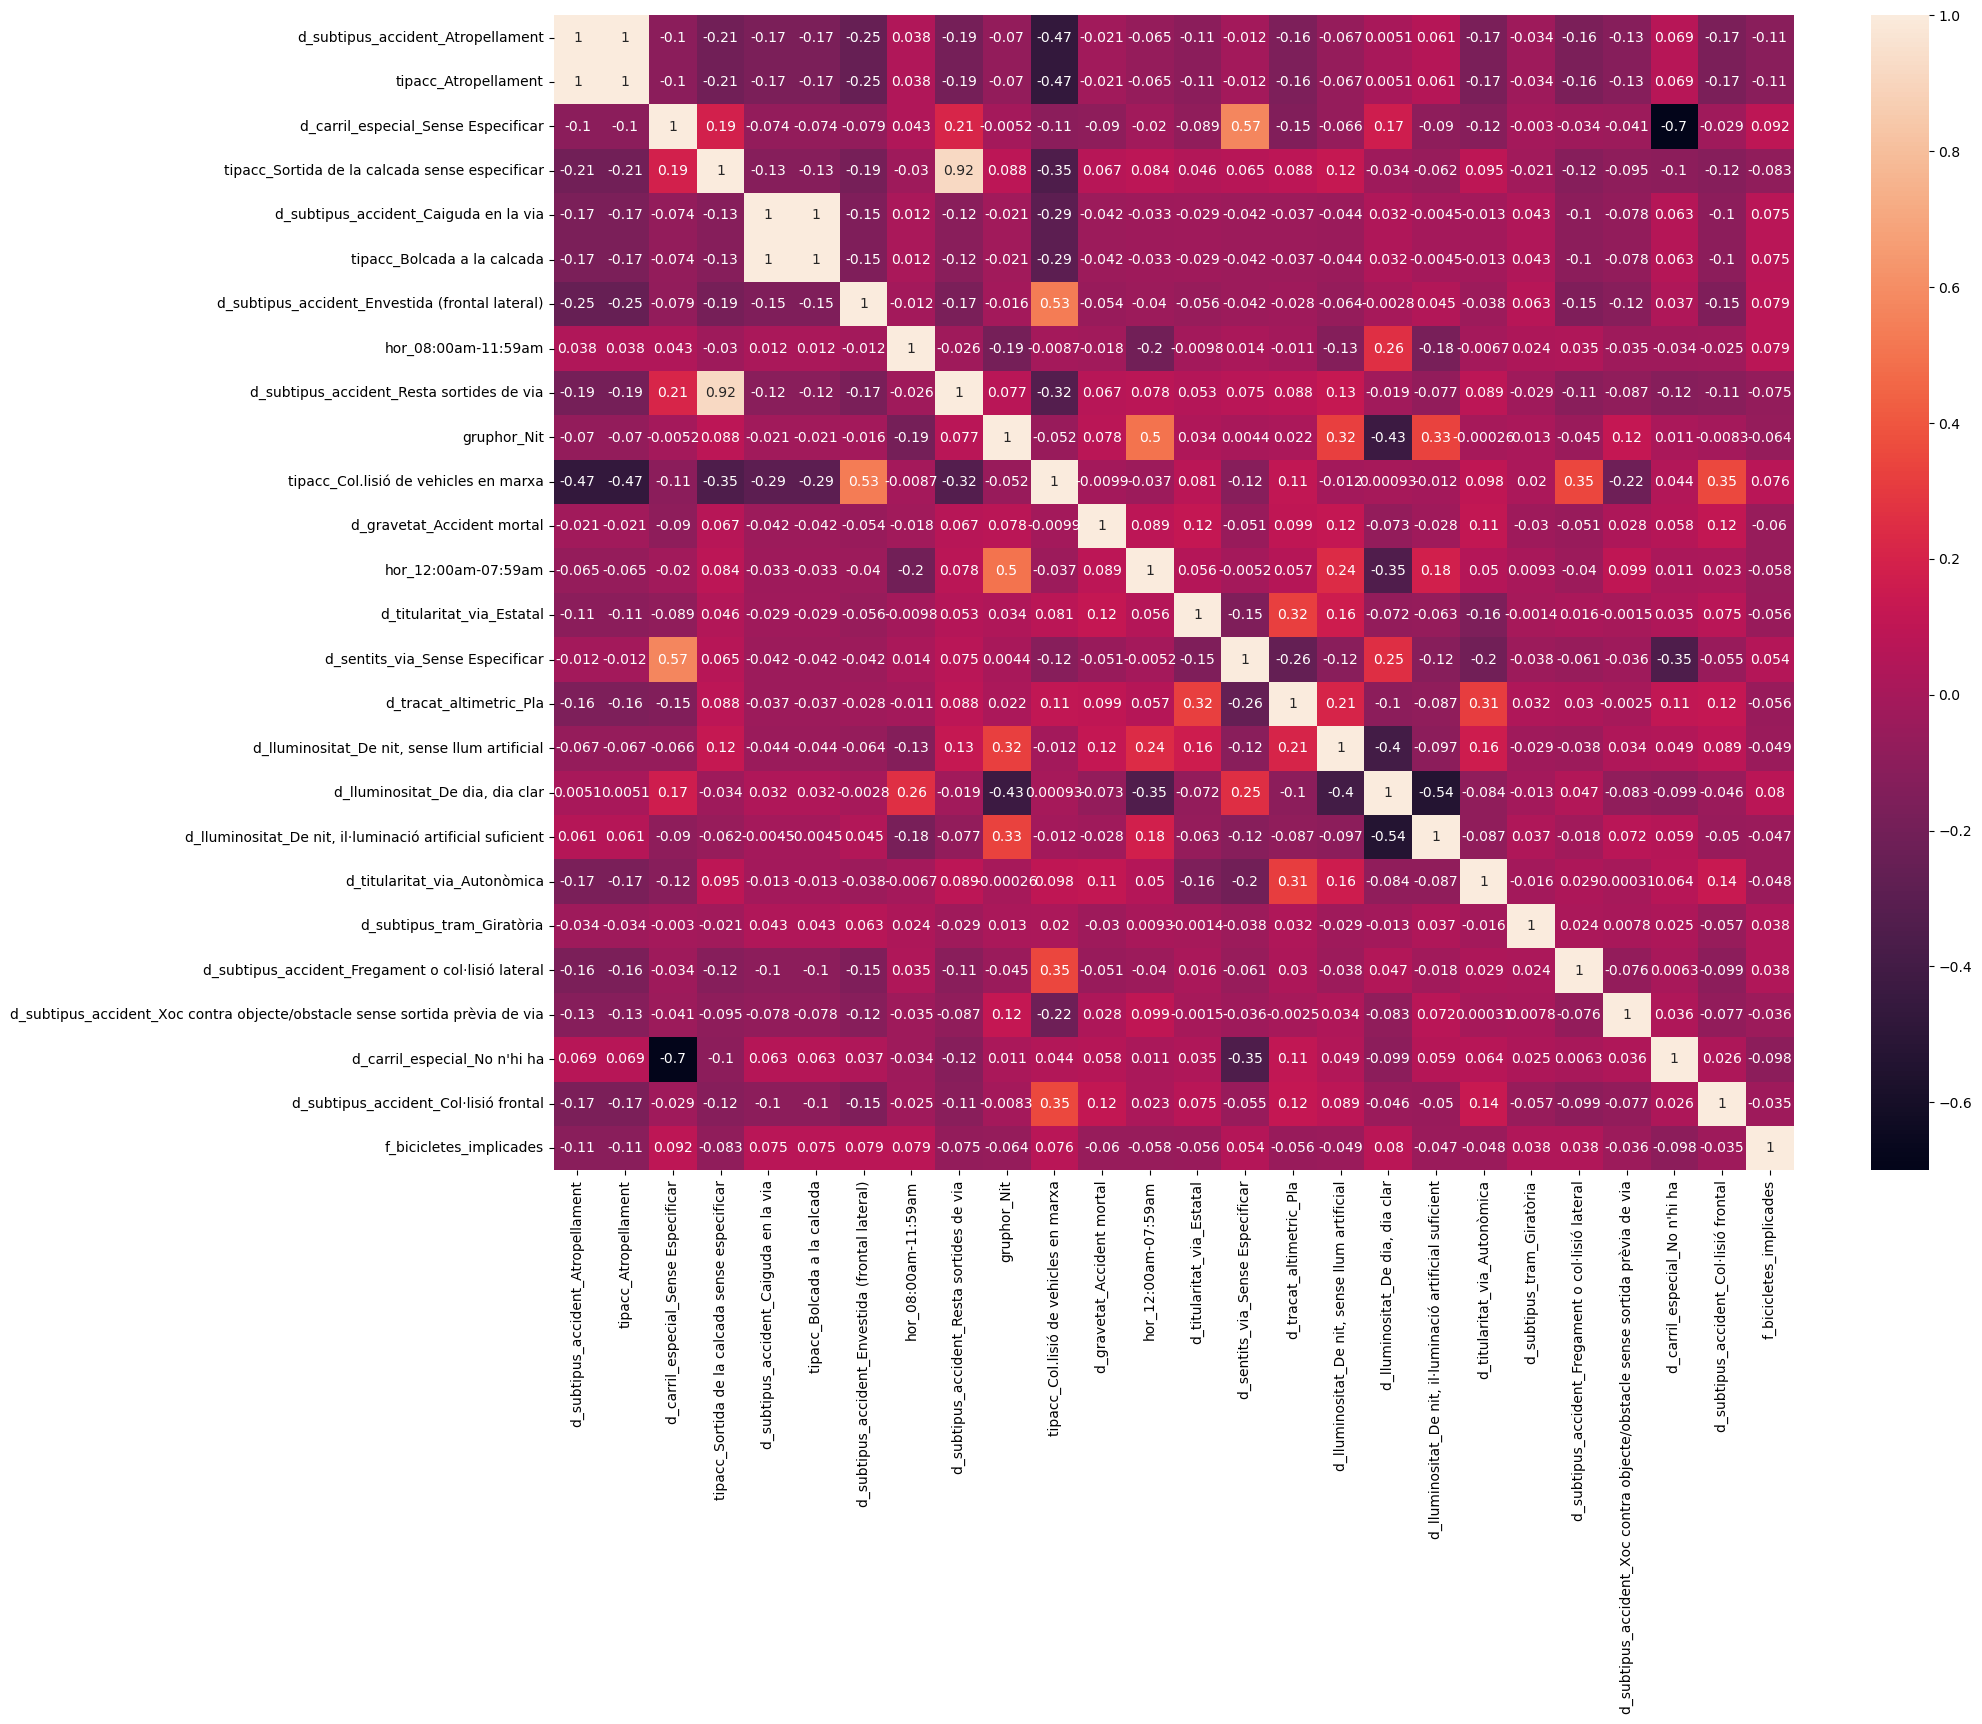

In [34]:
corr_matrix = coll_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [35]:
col_viz = ['tipacc_Atropellament','d_subtipus_accident_Atropellament','tipacc_Bolcada a la calcada','d_subtipus_accident_Caiguda en la via']

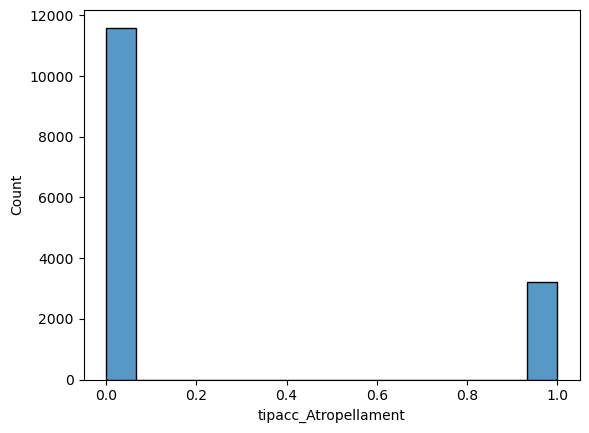

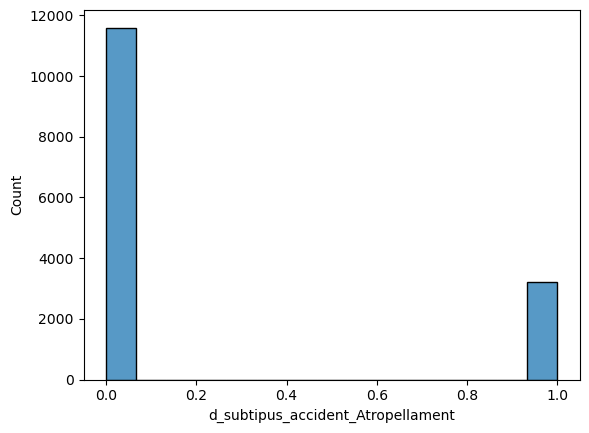

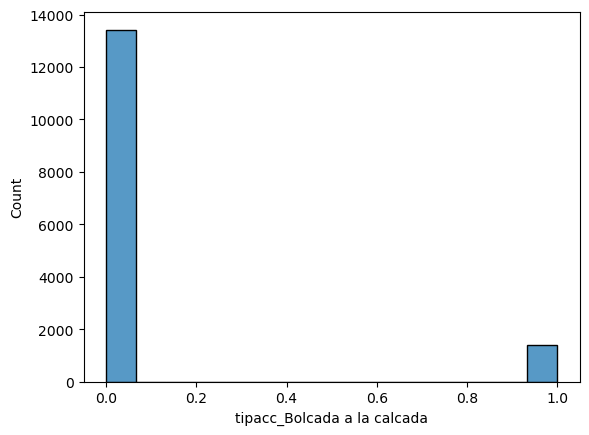

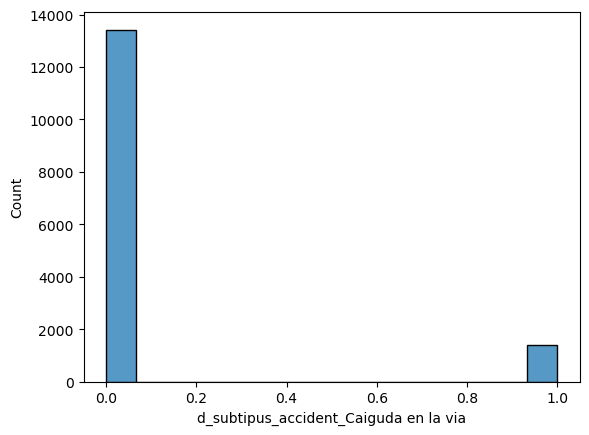

In [36]:
for column in coll_data[col_viz]:
    sns.histplot( x=coll_data[column])
    plt.show()

In [37]:
col_to_drop = ['tipacc_Atropellament','tipacc_Bolcada a la calcada']

In [38]:
X_train = X_train_all.drop(col_to_drop, axis = 1)
X_train.shape
X_test = X_test_all.drop(col_to_drop, axis = 1)
X_test

d_subtipus_accident_Atropellament  d_carril_especial_Sense Especificar  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   
...                                 ...                                  ...   
6344                                0.0                                  0.0   
6345                                0.0                                  0.0   
6346                                0.0                                  0.0   
6347                                0.0                                  0.0   
6348                                0.0                                  0.0   

      tipacc_Sortida de la calcada sense especificar  \
0                                                0.0   
1                                                1.0   
2                                                1.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
6344                                             0.0   
6345                                             0.0   
6346                                             0.0   
6347                                             0.0   
6348                                             0.0   

      d_subtipus_accident_Caiguda en la via  \
0                                       1.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
6344                                    0.0   
6345                                    0.0   
6346                                    1.0   
6347                                    0.0   
6348                                    0.0   

      d_subtipus_accident_Envestida (frontal lateral)  hor_08:00am-11:59am  \
0                                                 0.0                  0.0   
1                                                 0.0                  1.0   
2                                                 0.0                  1.0   
3                                                 0.0                  0.0   
4                                                 0.0                  0.0   
...                                               ...                  ...   
6344                                              1.0                  0.0   
6345                                              0.0                  0.0   
6346                                              0.0                  0.0   
6347                                              0.0                  0.0   
6348                                              1.0                  0.0   

      d_subtipus_accident_Resta sortides de via  gruphor_Nit  \
0                                           0.0          0.0   
1                                           0.0          0.0   
2                                           1.0          0.0   
3                                           0.0          0.0   
4                                           0.0          0.0   
...                                         ...          ...   
6344                                        0.0          0.0   
6345                                        0.0          0.0   
6346                                        0.0          0.0   
6347                                        0.0          0.0   
6348                                        0.0          0.0   

      tipacc_Col.lisió de vehicles en marxa  d_gravetat_Accident mortal  \
0                         

# Running a model with the chosen features.

In [39]:
print("X_train:", X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",y_test.shape)
print("y_test:",y_test.shape)

X_train: (14812, 23)
y_train: (14812,)
X_test: (6349,)
y_test: (6349,)


In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.9201323251417769
TestSet =  0.914947235785163


In [41]:
y_train.value_counts()

0    13629
1     1183
Name: f_bicicletes_implicades, dtype: int64

C:\Users\joanv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


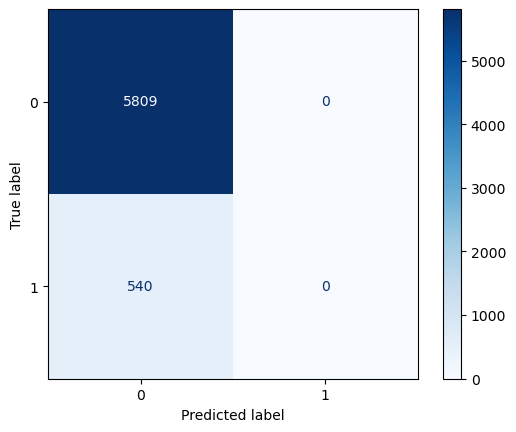

In [42]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# From the confusion matrix we can see that our model only predicted YES bikes involved.

# Fixing imbalance

In [43]:
for_over_sample = pd.concat([X_train,y_train], axis=1)
for_over_sample.shape

(14812, 24)

In [44]:
no_bike_involved = for_over_sample[for_over_sample['f_bicicletes_implicades']==0]
yes_bike_involded = for_over_sample[for_over_sample['f_bicicletes_implicades']==1]

from sklearn.utils import resample
yes_bike_involved_over_sampled = resample(yes_bike_involded, 
                                    replace=True,
                                    n_samples = len(no_bike_involved),
                                    random_state=42)


display(yes_bike_involved_over_sampled.shape)
display(no_bike_involved.shape)

(13629, 24)

(13629, 24)

In [45]:
oversampled_target = pd.concat([yes_bike_involved_over_sampled,no_bike_involved], axis = 0)

# scrambled rows to avoid yes/no clusters
oversampled_total = oversampled_target.sample(frac=1)

X_train_oversampled = oversampled_total.drop(['f_bicicletes_implicades'], axis = 1)

y_train_oversampled =oversampled_total['f_bicicletes_implicades']

display(X_train_oversampled.shape)
display(y_train_oversampled.shape)

(27258, 23)

(27258,)

# Re-FIT Classifier with the oversampled train set

In [46]:
clf2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf2.fit(X_train_oversampled, y_train_oversampled)
print('TrainSet = ',clf.score(X_train_oversampled, y_train_oversampled))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.5
TestSet =  0.914947235785163


In [47]:
# scores with second cleaned data (less categorized)
pred_RF = clf2.predict(X_test)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF))
print("recall: ",recall_score(y_test,pred_RF))
print("f1: ",f1_score(y_test,pred_RF))

accuracy: 0.5898566703417861
precision:  0.15064319566689235
recall:  0.8240740740740741
f1:  0.25472238122495705


# Look how the new oversampled model works on the test set

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

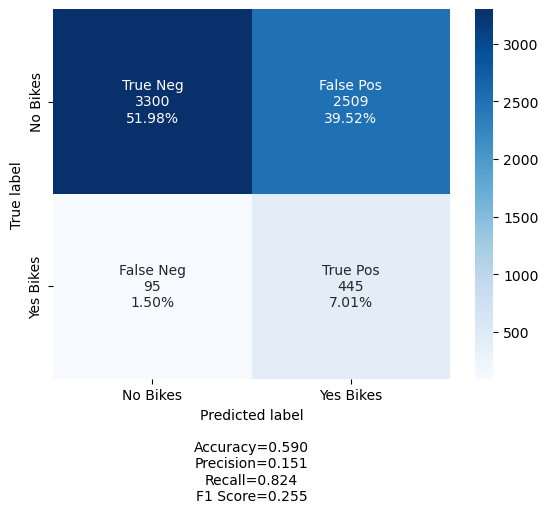

In [57]:
cf_matrix = confusion_matrix(y_test, pred_RF)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No Bikes', 'Yes Bikes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap=plt.cm.Blues)

In [66]:
pred_RF = clf2.predict(X_test)


array = confusion_matrix(y_test, pred_RF)
Q1 = array[0][0]
Q2 = array[0][1]
Q3 = array[1][0]
Q4 = array[1][1]
print(Q1)
print(Q2)
print(Q3)
print(Q4)
print(categories[0])
print(categories[1])

3300
2509
95
445
No Bikes
Yes Bikes


In [65]:
print('In the above plot we can see that there are',Q3,'accidents with bikes of whom the model predicts they will be',categories[0], 'when they actually are',categories[1],'.')
print('There are also', Q2 ,'accidents with bikes of whom the model predicts they will be',categories[1],'when they actually are not.')

In the above plot we can see that there are 95 accidents with bikes of whom the model predicts they will be No Bikes when they actually are Yes Bikes .
There are also 2509 accidents with bikes of whom the model predicts they will be Yes Bikes when they actually are not.


# Run regression models

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor


In [52]:
def models_automation(models, X_train_oversampled, y_train_oversampled,X_test,y_test):
    for model in models:
        model.fit(X_train_oversampled, y_train_oversampled)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train_oversampled, y_train_oversampled)}, Test -> {model.score(X_test, y_test)}")

In [53]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train_oversampled,y_train_oversampled,X_test,y_test)

LinearRegression: Train -> 0.20700262455400031, Test -> -1.7080080184123707
SGDRegressor: Train -> 0.20370158880016398, Test -> -1.6993713673205262
KNeighborsRegressor: Train -> 0.29072419106317393, Test -> -2.058666564653826
MLPRegressor: Train -> 0.36680724704438716, Test -> -1.4401479343252581
DecisionTreeRegressor: Train -> 0.39959251219540703, Test -> -1.5538081233957621
RandomForestRegressor: Train -> 0.39853260933859525, Test -> -1.527180221758933


# Conclusion, with this dataset we can say that we don't have a good model to make some predictions.